#Ekstraksi Dokumen
---

In [1]:
!pip install requests beautifulsoup4

In [2]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

# Inisialisasi list untuk menyimpan data dari semua halaman
all_data = []

# Jumlah halaman yang ingin di-crawl
total_pages = 1

# Looping untuk mengambil judul dan isi konten berita dari setiap halaman
for page in range(1, total_pages + 1):
    # URL target dengan nomor halaman
    url = f"https://news.detik.com/indeks/{page}"

    # Mengirim permintaan HTTP GET ke URL
    response = requests.get(url)

    # Memeriksa apakah permintaan berhasil
    if response.status_code == 200:
        # Parsing HTML dengan BeautifulSoup
        soup = BeautifulSoup(response.text, 'html.parser')

        # Cari semua elemen <h3> dengan class 'media__title'
        judul_berita_elements = soup.find_all('h3', class_='media__title')

        # Looping untuk mengambil judul dan isi konten dari setiap berita
        for judul_element in judul_berita_elements:
            # Mengambil judul berita
            judul_berita = judul_element.text.strip()

            # Mengambil URL selengkapnya
            selengkapnya_link = judul_element.find('a')['href']

            # Mengirim permintaan HTTP GET ke halaman selengkapnya
            selengkapnya_response = requests.get(selengkapnya_link)
            if selengkapnya_response.status_code == 200:
                selengkapnya_soup = BeautifulSoup(selengkapnya_response.text, 'html.parser')
                # Mencari dan mengambil isi konten berita
                isi_berita_elements = selengkapnya_soup.find_all('div', class_='detail__body-text')
                isi_berita = "\n".join([elem.text.strip() for elem in isi_berita_elements])
            else:
                isi_berita = "Tidak dapat mengambil berita"

            # Menambahkan data ke list
            all_data.append([judul_berita] + [isi_berita])

    else:
        print(f"Gagal mengambil halaman {url}, kode status: {response.status_code}")

# Membuat DataFrame dari list data
berita_online = pd.DataFrame(all_data, columns=["Judul Berita", "Isi Berita"])

In [3]:
berita_online

,Judul Berita,Isi Berita
0,"Prabowo-Gibran Nomor Urut 2, Prabowo Mania 08:...",Jakarta - Organisasi relawan Prabowo Mania 08 ...
1,Demokrat: Kami Sampai 1 Oktober 2024 Masih Opo...,"Waketum Partai Demokrat, Benny K Harman mengat..."
2,Prabowo Sambut Menhan AS Lloyd Austin di ADMM ...,Jakarta - Menteri Pertahanan (Menhan) RI Prabo...
3,Persatuan Advokat Demokrasi Indonesia Adukan A...,Jakarta - Persatuan Advokat Demokrasi Indonesi...
4,Sulsel Jadi Tuan Rumah Bimtek Sistem Pemantaua...,Jakarta - Kementerian Dalam Negeri (Kemendagri...
5,Relawan Bravo 5 Deklarasi Dukung Prabowo-Gibra...,Jakarta - Relawan Bravo 5 yang berisikan beber...
6,Heru Budi: Pengangguran di Jakarta Turun Jadi ...,Jakarta - Penjabat (Pj) Gubernur DKI Jakarta H...
7,Bangga! Briptu Renita Rismayanti Raih Pengharg...,Jakarta - Kabar membanggakan datang dari polis...
8,Penampakan Crane Roboh di Cibinong,Cibinong - Sebuah crane roboh di Jalan Raya Ma...
9,KPU Pandeglang Sudah Terima Bilik hingga Tinta...,Jakarta - Komisi Pemilihan Umum (KPU) Pandegla...


#Bentuk TF-IDF isi berita

In [4]:
#Mengambil 5 data sebagai contoh
data = berita_online['Isi Berita'].head(5)

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Inisialisasi TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Mengubah teks berita menjadi vektor TF-IDF
tfidf_matrix = tfidf_vectorizer.fit_transform(data)

# Membuat DataFrame untuk hasil TF-IDF
df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())


#Kosinus similaritas

In [6]:
df_tfidf

,04575,08,10th,11,12,14,15,17,19,1999,...,wajah,waketum,wakil,wamenhan,wib,widodo,wilayah,with,yaitu,yang
0,0.000000,0.118802,0.000000,0.022310,0.000000,0.000000,0.022310,0.000000,0.000000,0.000000,...,0.079201,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.022310,0.000000,0.089241
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.181826,0.000000,0.000000,0.000000,0.181826,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.029988,0.016895,0.000000,0.029988,0.033789,0.089964,0.029988,0.000000,...,0.000000,0.000000,0.029988,0.089964,0.029988,0.000000,0.000000,0.016895,0.029988,0.135158
3,0.044603,0.000000,0.000000,0.025129,0.044603,0.000000,0.025129,0.000000,0.000000,0.044603,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025129,0.000000,0.150772
4,0.000000,0.000000,0.000000,0.041432,0.000000,0.000000,0.020716,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.110311,0.020716,0.000000,0.145011


In [7]:
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Menghitung matriks similarity
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Membuat DataFrame untuk similarity matrix
df_similarity = pd.DataFrame(similarity_matrix, columns=range(1, len(data) + 1), index=range(1, len(data) + 1))


In [8]:
# Menampilkan similarity matrix
print("Similarity Matrix:")
df_similarity

Similarity Matrix:


,1,2,3,4,5
1,1.000000,0.038124,0.190766,0.150977,0.192056
2,0.038124,1.000000,0.004891,0.000000,0.016347
3,0.190766,0.004891,1.000000,0.103868,0.136509
4,0.150977,0.000000,0.103868,1.000000,0.194137
5,0.192056,0.016347,0.136509,0.194137,1.000000


#Graph

In [9]:
!pip install networkx matplotlib

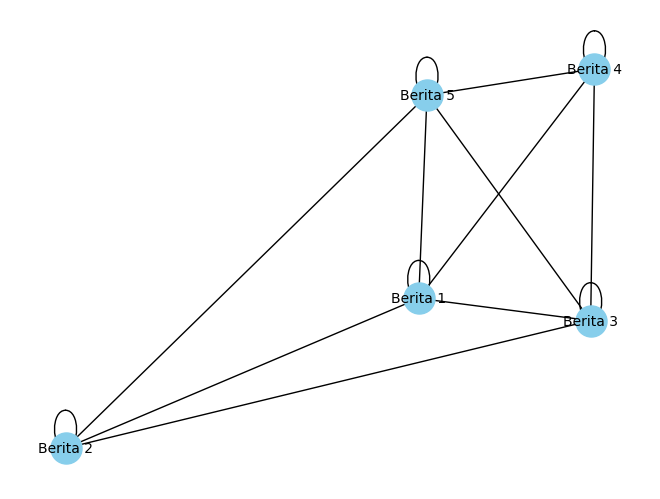

In [10]:
import networkx as nx
import matplotlib.pyplot as plt

# Menggunakan similarity matrix dari contoh sebelumnya
G = nx.from_pandas_adjacency(df_similarity)

# Mengatur label pada node
labels = {i: f"Berita {i}" for i in G.nodes}

# Membuat posisi node (gunakan salah satu algoritma posisi, misalnya spring_layout)
pos = nx.spring_layout(G)

# Menggambar graf
nx.draw(G, pos, with_labels=True, labels=labels, node_size=500, node_color='skyblue', font_size=10, font_color='black')

# Menampilkan graf
plt.show()


#Closeness Centrality

In [11]:
import networkx as nx

# Menggunakan similarity matrix dari contoh sebelumnya
G = nx.from_pandas_adjacency(df_similarity)

# Menghitung closeness centrality
closeness_centrality = nx.closeness_centrality(G)

# Menampilkan closeness centrality dari setiap node
for node, centrality in closeness_centrality.items():
    print(f"Node {node}: Closeness Centrality = {centrality}")

Node 5: Closeness Centrality = 1.0
Node 4: Closeness Centrality = 0.8
Node 3: Closeness Centrality = 1.0
Node 2: Closeness Centrality = 0.8
Node 1: Closeness Centrality = 1.0


In [12]:
import networkx as nx

# Menggunakan similarity matrix dari contoh sebelumnya
G = nx.from_pandas_adjacency(df_similarity)

# Menghitung closeness centrality
closeness_centrality = nx.closeness_centrality(G)

# Menghitung PageRank
pagerank = nx.pagerank(G)

# Menghitung eigenvector centrality
eigenvector_centrality = nx.eigenvector_centrality(G)

# Menambahkan closeness centrality, pagerank, dan eigenvector centrality ke setiap node
for node, centrality in closeness_centrality.items():
    G.nodes[node]['Closeness Centrality'] = centrality
    G.nodes[node]['PageRank'] = pagerank[node]
    G.nodes[node]['Eigenvector Centrality'] = eigenvector_centrality[node]

# Menampilkan closeness centrality, pagerank, dan eigenvector centrality dari setiap node
for node, data in G.nodes(data=True):
    closeness = data['Closeness Centrality']
    pagerank = data['PageRank']
    eigenvector = data['Eigenvector Centrality']
    print(f"Node {node}: Closeness Centrality = {closeness}, PageRank = {pagerank}, Eigenvector Centrality = {eigenvector}")


Node 5: Closeness Centrality = 1.0, PageRank = 0.20740260324009357, Eigenvector Centrality = 0.4792292952968508
Node 4: Closeness Centrality = 0.8, PageRank = 0.1975074916740081, Eigenvector Centrality = 0.3943461978945982
Node 3: Closeness Centrality = 1.0, PageRank = 0.19671804271382146, Eigenvector Centrality = 0.4792292952968508
Node 2: Closeness Centrality = 0.8, PageRank = 0.18628677753135592, Eigenvector Centrality = 0.3943461978945982
Node 1: Closeness Centrality = 1.0, PageRank = 0.2120850848407212, Eigenvector Centrality = 0.4792292952968508
